## 분류 모델 비교

In [1]:
# data load
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
iris_x = iris.data
iris_y = iris.target

x_train, x_test, y_train, y_test = train_test_split(iris_x, iris_y, test_size = 0.2, random_state = 0)

### **1) Decision Tree**

In [2]:
result = dict()

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
result['Decision Tree'] = clf.score(x_test, y_test)
result['Decision Tree']

1.0

In [3]:
result

{'Decision Tree': 1.0}

### **2) NaiveBayes**
- 비정형(글자데이터에 유능?)

In [4]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)
result['GaussianNB'] = clf.score(x_test, y_test)
result['GaussianNB']

0.9666666666666667

### **3)K-NN**

In [5]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
result['KNN'] = clf.score(x_test, y_test)
result['KNN']

0.9666666666666667

### **4)Logistic Regression**

In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y_train)
result['LR'] = clf.score(x_test, y_test)
result['LR']

/Users/jeong_ahn/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

### **5)SVC**

In [7]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(x_train, y_train)
result['SVC'] = clf.score(x_test, y_test)
result['SVC']

1.0

### **6)RandomForest**

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
result['RandomForestClassifier'] = clf.score(x_test, y_test)
result['RandomForestClassifier']

1.0

### **7)Boosting**

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)
result['GradientBoostingClassifier'] = clf.score(x_test, y_test)
result['GradientBoostingClassifier']

1.0

### **8)xgboost**

In [10]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(x_train, y_train)
result['XGBClassifier'] = clf.score(x_test, y_test)
result['XGBClassifier']

1.0

## 분류모델 성능평가 비교

In [11]:
result

{'Decision Tree': 1.0,
 'GaussianNB': 0.9666666666666667,
 'KNN': 0.9666666666666667,
 'LR': 1.0,
 'SVC': 1.0,
 'RandomForestClassifier': 1.0,
 'GradientBoostingClassifier': 1.0,
 'XGBClassifier': 1.0}

In [12]:
# pandas
import pandas as pd
pd.Series(result)

Decision Tree                 1.000000
GaussianNB                    0.966667
KNN                           0.966667
LR                            1.000000
SVC                           1.000000
RandomForestClassifier        1.000000
GradientBoostingClassifier    1.000000
XGBClassifier                 1.000000
dtype: float64

### ROC

In [13]:
print(__doc__)

Automatically created module for IPython interactive environment


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

iris = datasets.load_iris()
X = iris.data
y = iris.target

# binarize the output (3개를 2진분류로)
y = label_binarize(y, classes=[0,1,2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                        random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# compute micro-average ROC curve and ROC area
fpr['micro'], tpr['micro'], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

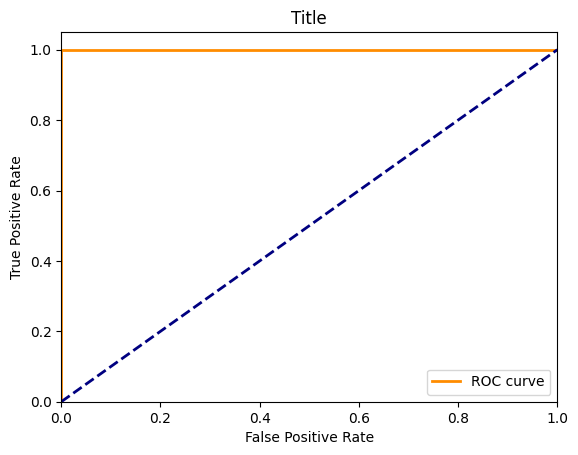

In [22]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
        lw=lw, label='ROC curve')
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Title")
plt.legend(loc='lower right')
plt.show()


- roc curve 
    - FPR, TPR 변화값 보는데 이용
    - AUC값 : ROC곡선 면적, 1에 가까워야 좋음